In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import sys
from jupyterthemes import jtplot

In [2]:
jtplot.style('default', grid=False)

# Estimate N$_{molec}$ per ML 

### Estimate solute molecules injected
We assume that the initial concentration was 1 mM (we performed a 10-pulse deposition before so it is not exactly correct)

Then, the initial number of solute molecules was 

$$N_i = V_{\mathrm{stock}} \times C = 0.3 \mathrm{mL} \times 10^{-3} \mathrm{mol}/L = 3\times10^{-7} \mathrm{mol} $$

## Estimate FBI molecular area

In [64]:
from dataclasses import dataclass
@dataclass
class Molecule:
    """Molecule to estimate molecular volume
    p : density (in g/cm3)
    M : molar mass (in g/mol)
    V : molecular volume (estimate, in cm3)"""
    name : str
    p : float
    M : float
    def volume(self)->float:
        Na = 6.022e23
        return self.M/self.p/Na

In [76]:
crw_eth = Molecule('18-Crown-6', p = 1.237, M = 264.315)
crw_eth.volume()
print('Estimated crown ether volume: {0:5.1e} cm3'.format(crw_eth.volume()))
print('Molecule size (order of magn.): {0:5.1e} cm = {1:5.1e} nm'.format(crw_eth.volume()**(1/3), crw_eth.volume()**(1/3)/1e-7))

Estimated crown ether volume: 3.5e-22 cm3
Molecule size (order of magn.): 7.1e-08 cm = 7.1e-01 nm


In [80]:
Pentane = Molecule('Pentane', M = 70.1, p = 0.751)
Pentane.volume()
print('Estimated Pentane volume: {0:5.1e} cm3'.format(Pentane.volume()))
print('Molecule size (order of magn.): {0:5.1e} cm = {1:5.1e} nm'.format(Pentane.volume()**(1/3), Pentane.volume()**(1/3)/1e-7))

Estimated Pentane volume: 1.6e-22 cm3
Molecule size (order of magn.): 5.4e-08 cm = 5.4e-01 nm


In [81]:
Benzene = Molecule('Benzene', M = 78.114, p = 0.8765)
Benzene.volume()
print('Estimated Benzene volume: {0:5.1e} cm3'.format(Benzene.volume()))
print('Molecule size (order of magn.): {0:5.1e} cm = {1:5.1e} nm'.format(Benzene.volume()**(1/3), Benzene.volume()**(1/3)/1e-7))

Estimated Benzene volume: 1.5e-22 cm3
Molecule size (order of magn.): 5.3e-08 cm = 5.3e-01 nm


In [111]:
V_FBI = crw_eth.volume() + 3 * Benzene.volume() + 2 * Pentane.volume()
print('Estimated FBI volume: {0:5.1e} cm3'.format(V_FBI))
print('Molecular area (order of magn.): {0:5.2e} cm2 = {1:5.1e} nm2'.format(V_FBI**(2/3), V_FBI**(2/3)/1e-14))

Estimated FBI volume: 1.1e-21 cm3
Molecular area (order of magn.): 1.07e-14 cm2 = 1.1e+00 nm2


### According to Fernando's estimation:
- For globularity 0.81: 
 
 -$r_{FBI}$ = 6.83 Å, $S_{FBI}$ = 146.7 Å$^2$
- For globularity 1:

 -$r_{FBI}$ = 7.33 Å, $S_{FBI}$ = 168.8 Å$^2$

We'll take the first value, just because

In [32]:
from invisible_cities.core.system_of_units import cm2, micron2, mol, ml, l
area_molec = 146.7e-8 * micron2

## Estimate number of molecules in a ML on a 1µm$^2$ substrate

In [11]:
area_substr = 1 * micron2
N_ML = area_substr/area_molec
print('Number of molecules in a densely packed ML: {0:5.0f} molecs/µm2'.format(N_ML))

Number of molecules in a densely packed ML: 681663 molecs/µm2


###  Now take a ML on a 1cm$^2$ substrate, full size sample

In [15]:
area_molec = 146.7e-8 * micron2
area_substr = 1 * cm2

N_ML = area_substr/area_molec
print('Number of molecules in a densely packed ML: {0:5.0f} molecs'.format(N_ML))

Number of molecules in a densely packed ML: 68166325835037 molecs


In [24]:
Na = 6.023e23
n_ML = N_ML/Na * mol
print('Number of mol in a densely packed ML: {0:5.0e} mol'.format(n_ML))

Number of mol in a densely packed ML: 1e-10 mol


## So from V$_{inj}$ (volume per injection, see below) we can estimate the needed concentration if the whole deposition was one pulse and all the spray landed on the substrate

In [38]:
V_inj = 0.012 # *ml

In [39]:
print('C = {0:5.2e} mol/mL = {1:5.2e} µmol/L'.format(n_ML/V_inj, n_ML/V_inj * 1e9))

C = 9.43e-09 mol/mL = 9.43e+00 µmol/L


## Assume a conic spray [...]

# Compute volume per pulse 

## ALI depletion test for 100 pulses, 1 bar GAr
 - Goal: estimate $\delta V = V/N$: typical injected volume per pulse from the initially injected volume V and number of pulses N required to deplete it.

## Estimate maximum injected mass at the time for ~10 pulses, 1 bar GAr  

In [41]:
from ali.ali_sw import *

## Run 1
 - p$_{Ar}$ = 1000 mbar
 - t$_{on}$ = 70 ms
 - 100 pulses

In [42]:
df = load_raw_ali_df('../ali_data/18072019_ALI_Cleaning_200mbar_70ms_100pulses_rga')

/Users/pabloherrero/sabat/sabatsw/ali/ali_sw.py:21: UserWarning:  does not exist: file = ../ali_data/18072019_ALI_Cleaning_200mbar_70ms_100pulses_rga 
  except IOError: warnings.warn(f' does not exist: file = {filename} ', UserWarning)


In [43]:
peaks, troughs = plot_pressure_curve(df, tit='100 pulses, 70 ms, 200 mbar')

AttributeError: 'NoneType' object has no attribute 'index'

<Figure size 720x576 with 0 Axes>

In [63]:
troughs[7] += np.where(df.p_chamber[troughs[7]:peaks[7]] >= 2e-7)[0][0] - 1

In [67]:
troughs[7] -= 1

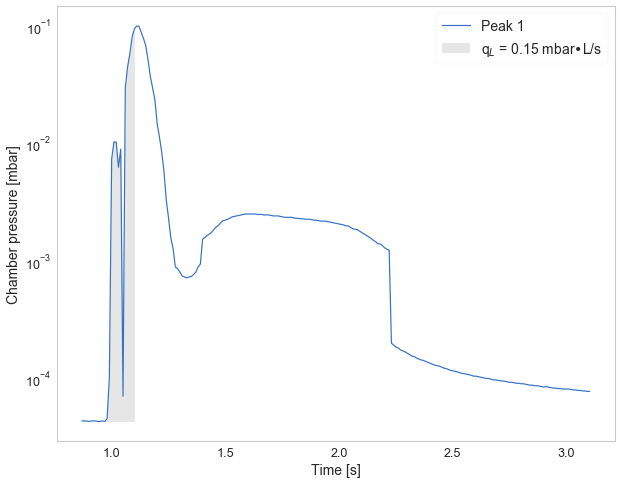

In [9]:
plot_pressure_curve(df[troughs[0]-10:peaks[0]+200], tit='Peak 1', scale='s', flag_p=False)

# plt.plot(troughs[0]*10, df.p_chamber[troughs[0]], 'o', markersize=10)
# plt.plot(peaks[0]*10, df.p_chamber[peaks[0]], 'o', markersize=10)
plt.xlabel('Time [s]', fontsize=14)
_,_, q,_ = leaked_mass(df, peaks, troughs, )

x=df.index[troughs[0] : peaks[0]]/100
plt.fill_between(x, df.p_chamber[troughs[0]], df.p_chamber[troughs[0]:peaks[0]],  color='0.9', label='q$_L$ = %.2f mbar•L/s'%q[0])
plt.legend(loc='best', fontsize=14)

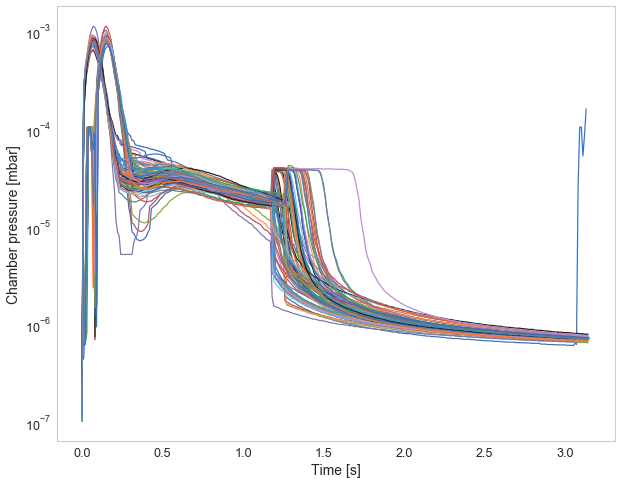

In [8]:
sc = 100
scale = 's'
xrange = 300
plt.figure(figsize=(10,8))

for i in range(len(peaks)-15):
    y = df.p_chamber[troughs[i]:peaks[i]+xrange]/sc
    x = df.index[troughs[i]:peaks[i]+xrange]/sc - df.index[troughs[i]]/sc
    
    plt.plot(x, y, '-', label='peak '+str(i));

    plt.xlabel('Time ['+scale+']', fontsize=14)
    plt.yscale('log')
    plt.ylabel('Chamber pressure [mbar]', fontsize=14)
#     plt.legend(loc='right',fontsize=4)

### Project peaks in 3d 

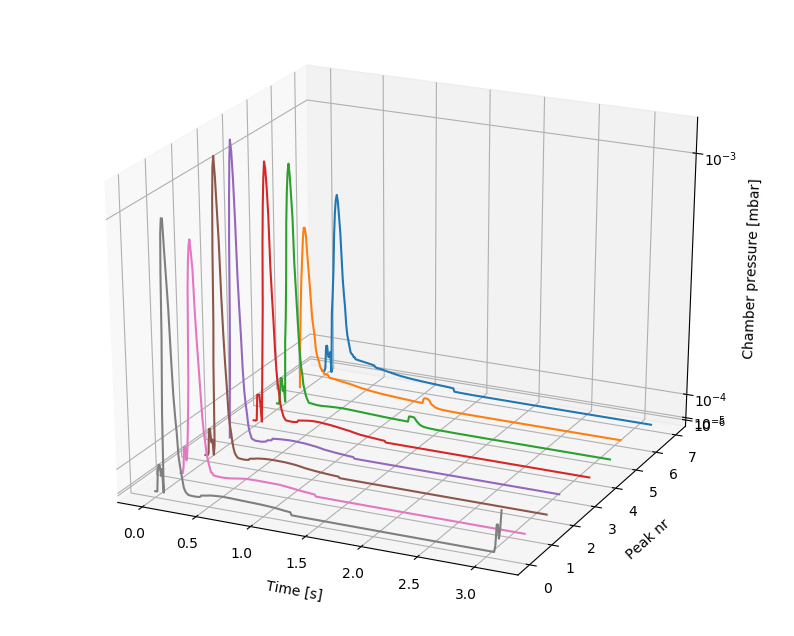

In [10]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

style.use('default')
sc = 100
scale = 's'
xrange = 300
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

for i in range(7,-1,-1):
    y = df.p_chamber[troughs[i]:peaks[i]+xrange]/sc
    x = df.index[troughs[i]:peaks[i]+xrange]/sc - df.index[troughs[i]]/sc
    
    ax.plot(x, y, zs=i, zdir='y', label='peak '+str(i));

    ax.set_xlabel('\nTime ['+scale+']')#, linespacing=3)
    ax.set_zscale('log')
    ax.set_zlabel('\nChamber pressure [mbar]')
    ax.set_ylabel('\nPeak nr')

#     ax.legend(loc='right',fontsize=14)
ax.view_init(elev=25., azim=-65)
plt.savefig('overlap_peaks3d.png', dpi=100)
plt.show()

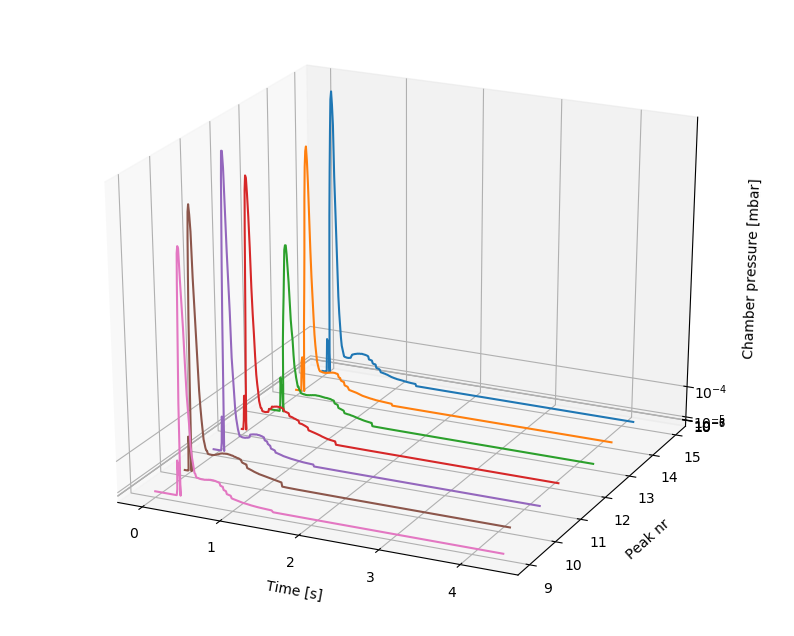

In [160]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style

style.use('default')
sc = 100
scale = 's'
xrange = 400
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

for i in range(15,8,-1):
    y = df.p_chamber[troughs[i]:peaks[i]+xrange]/sc
    x = df.index[troughs[i]:peaks[i]+xrange]/sc - df.index[troughs[i]]/sc
    
    ax.plot(x, y, zs=i, zdir='y', label='peak '+str(i));

    ax.set_xlabel('\nTime ['+scale+']')#, linespacing=3)
    ax.set_zscale('log')
    ax.set_zlabel('\nChamber pressure [mbar]')
    ax.set_ylabel('\nPeak nr')

#     ax.legend(loc='right',fontsize=14)
ax.view_init(elev=25., azim=-65)
plt.savefig('overlap_peaks3d.png', dpi=100)
plt.show()

#####  Pumping speed for methanol
$$ S = A_P C' \sigma $$
$A_P$ : Aperture area
C' : conductance per surface area
$\sigma$ : capture probability

from https://indico.cern.ch/event/471931/contributions/1149644/attachments/1226014/1794773/JUAS_Vacuum_Technology.pdf slide 46

#####  Leak rate q$_L$
$$ q_L = S_{efec} \int_{t_1}^{t_1+\Delta t} P(t) \mathrm{d}t = \frac{\Delta(p \cdot V)}{\Delta t} = \frac{R\cdot T}{M} \cdot \frac{\Delta m}{\Delta t} $$

$S_{efec}$ : Effective pumping speed (L/s)

$R$ : Gas constant (83.144598 L⋅mbar/K⋅mol)

$M$ : Molar mass (32.041 g/mol for methanol)

$\Delta m$ : leaked mass (g)
From https://doi.org/10.1063/1.4964434

##### Leaked mass $\Delta m$
$$ \Delta m_{tot} = q_L \cdot \Delta t \frac{M}{RT} $$

In [101]:
delta_m, q, delta_t, error_delta_m = leaked_mass(df, peaks, troughs, M = 32.041, Seff=71)

delta_m

array([0.00393087, 0.00382445, 0.00369756, 0.00471314, 0.0044948 ,
       0.00577679, 0.00581936, 0.00459521, 0.00521024, 0.01243837,
       0.00538924, 0.00699725, 0.00378951, 0.00591965, 0.00669834,
       0.00619897, 0.00478574, 0.00454128, 0.00430216, 0.00434961,
       0.00452013, 0.00571956, 0.00610394, 0.00342581, 0.00492976,
       0.00597134, 0.00423518, 0.00555692, 0.00602884, 0.00559959])

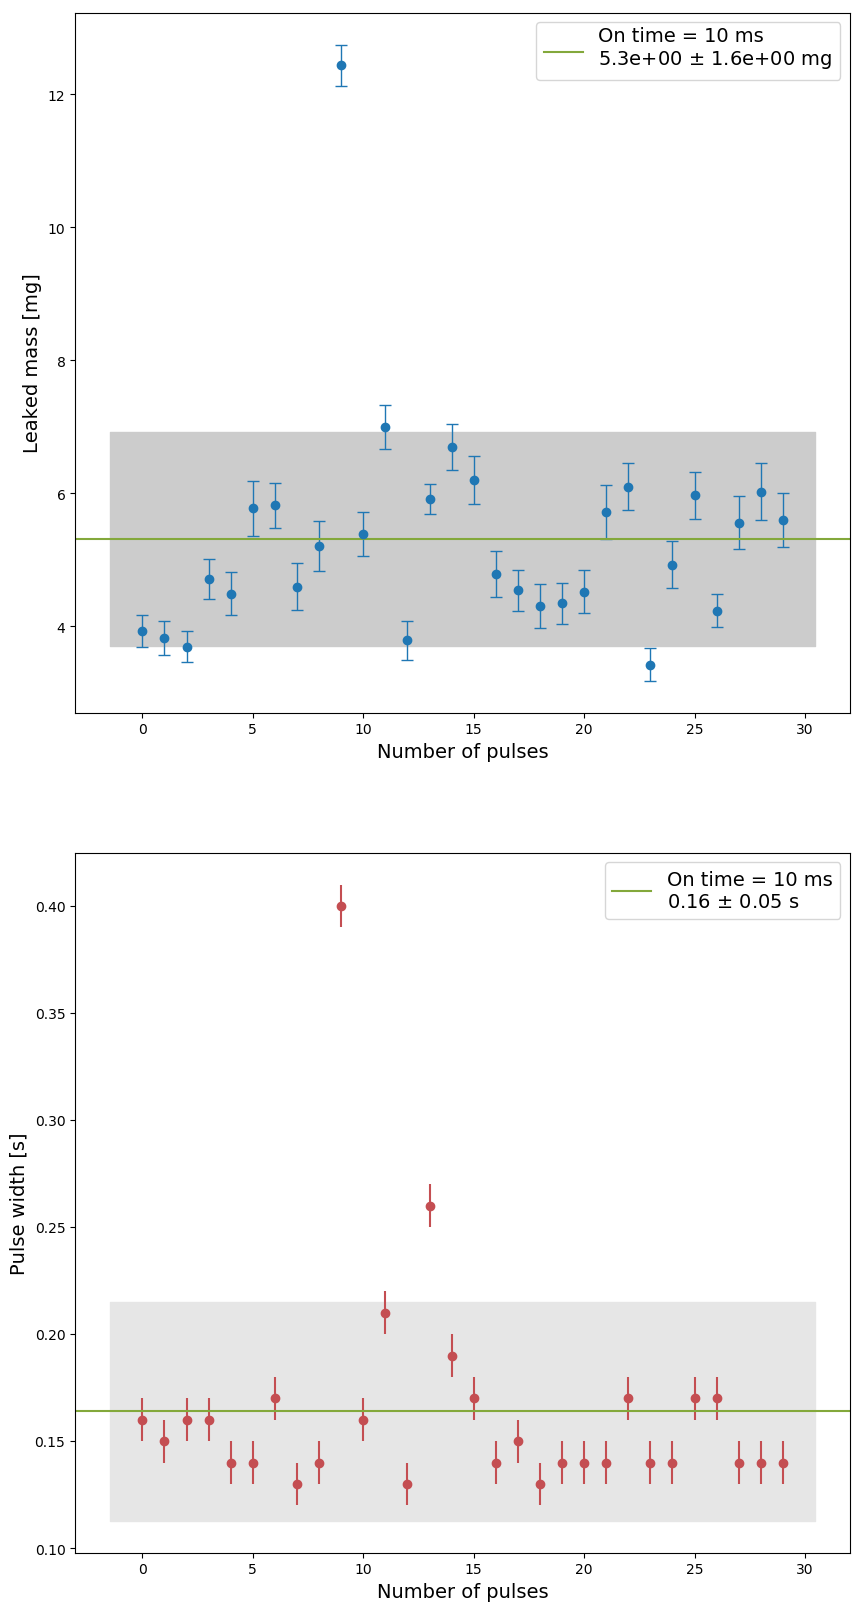

In [102]:
av_m, sd_m, _, _ = plot_leak_distributions(delta_m, error_delta_m, delta_t, label='10')

# Second run: 300 pulses

In [10]:
df1 = load_raw_ali_df('../ali_data/19072019_ALI_Cleaning_200mbar_70ms_300pulses_rga')

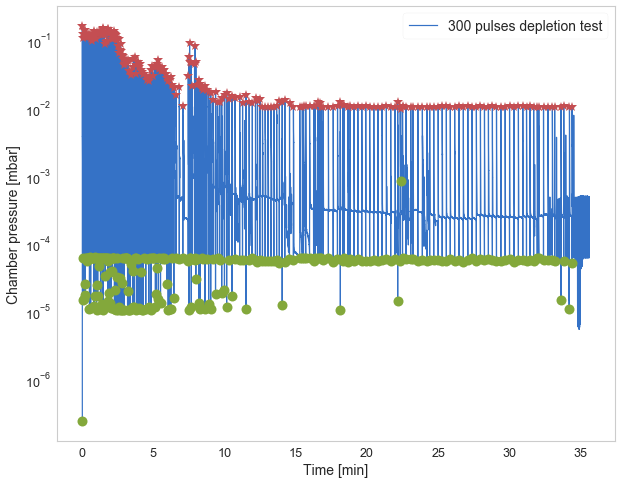

In [11]:
peaks1, troughs1 = plot_pressure_curve(df1, tit='300 pulses depletion test', th=0.05)

##### Compare the first and last peaks

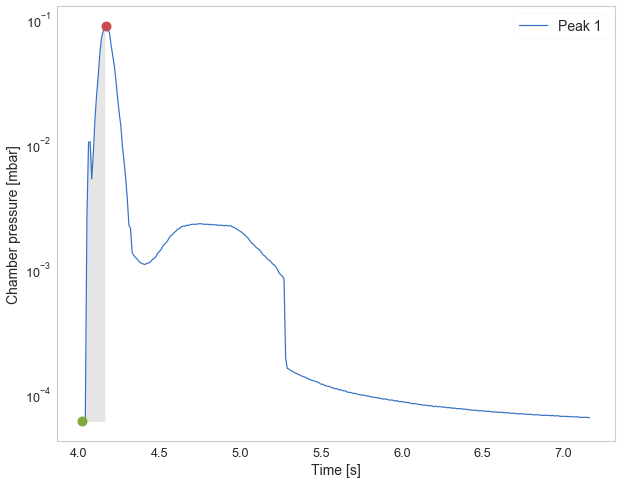

In [14]:
zoom_peak(1, df, peaks, troughs, xrange=300)

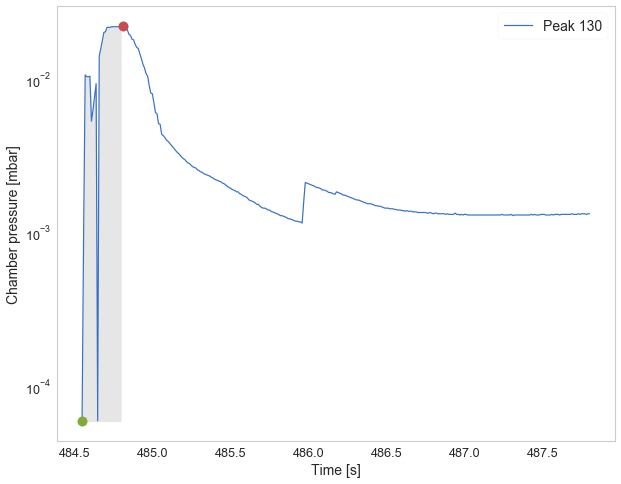

In [16]:
zoom_peak(130, df1, peaks1, troughs1, xrange=300)

In [424]:
len(peaks1)

244

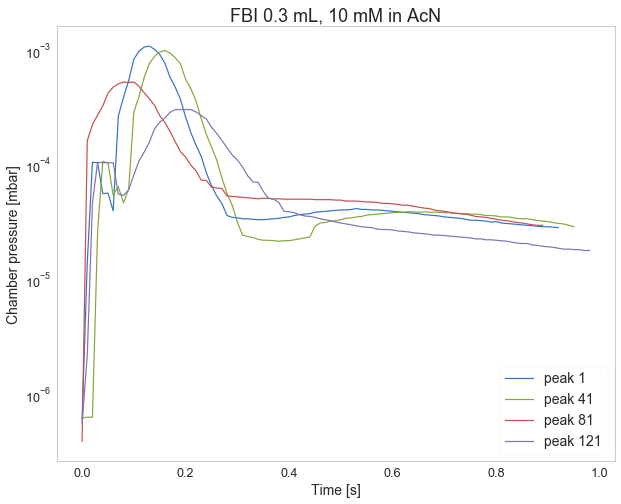

In [431]:
sc = 100
scale = 's'
xrange = 80
plt.figure(figsize=(10,8))

for i in np.arange(1,124, 40):
    y = df1.p_chamber[troughs1[i]:peaks1[i]+xrange]/sc
    x = df1.index[troughs1[i]:peaks1[i]+xrange]/sc - df1.index[troughs1[i]]/sc
    
    plt.plot(x, y, '-', label='peak '+str(i));

    plt.xlabel('Time ['+scale+']', fontsize=14)
    plt.yscale('log')
    plt.ylabel('Chamber pressure [mbar]', fontsize=14)
    plt.legend(loc='lower right',fontsize=14)
    plt.title('FBI 0.3 mL, 10 mM in AcN', fontsize=18)
# xline = x[np.where(y, y > 9e-5, y < 2e-4)]
# plt.fill_betweenx(y, xline[0], xline[-1], color='g')

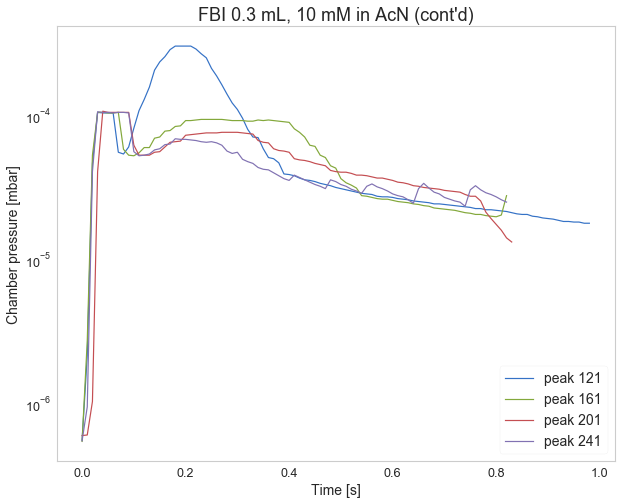

In [434]:
sc = 100
scale = 's'
xrange = 80
plt.figure(figsize=(10,8))

for i in np.arange(121,244, 40):
    y = df1.p_chamber[troughs1[i]:peaks1[i]+xrange]/sc
    x = df1.index[troughs1[i]:peaks1[i]+xrange]/sc - df1.index[troughs1[i]]/sc
    
    plt.plot(x, y, '-', label='peak '+str(i));

    plt.xlabel('Time ['+scale+']', fontsize=14)
    plt.yscale('log')
    plt.ylabel('Chamber pressure [mbar]', fontsize=14)
    plt.legend(loc='lower right',fontsize=14)
    plt.title("FBI 0.3 mL, 10 mM in AcN (cont'd)", fontsize=18)

# xline = x[np.where(y, y > 9e-5, y < 2e-4)]
# plt.fill_betweenx(y, xline[0], xline[-1], color='g')

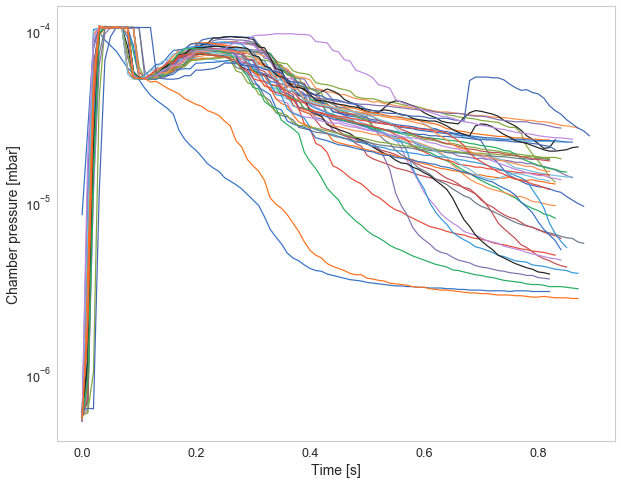

In [11]:
sc = 100
scale = 's'
xrange = 80
plt.figure(figsize=(10,8))

for i in range(200, 240):
    y = df1.p_chamber[troughs1[i]:peaks1[i]+xrange]/sc
    x = df1.index[troughs1[i]:peaks1[i]+xrange]/sc - df1.index[troughs1[i]]/sc
    
    plt.plot(x, y, '-', label='peak '+str(i));

    plt.xlabel('Time ['+scale+']', fontsize=14)
    plt.yscale('log')
    plt.ylabel('Chamber pressure [mbar]', fontsize=14)
#     plt.legend(loc='right',fontsize=4)

# xline = x[np.where(y, y > 9e-5, y < 2e-4)]
# plt.fill_betweenx(y, xline[0], xline[-1], color='g')

In [27]:
np.where((y > 9.9e-7) & (y < 1.1e-6), x, y)
y[(y > 9.7e-6) & (y < 1.2e-5)]

199049    0.000011
Name: p_chamber, dtype: float64

[18.0814124072459,
 13.078307096382206,
 0.13307377049180327,
 0.10897425384253609]

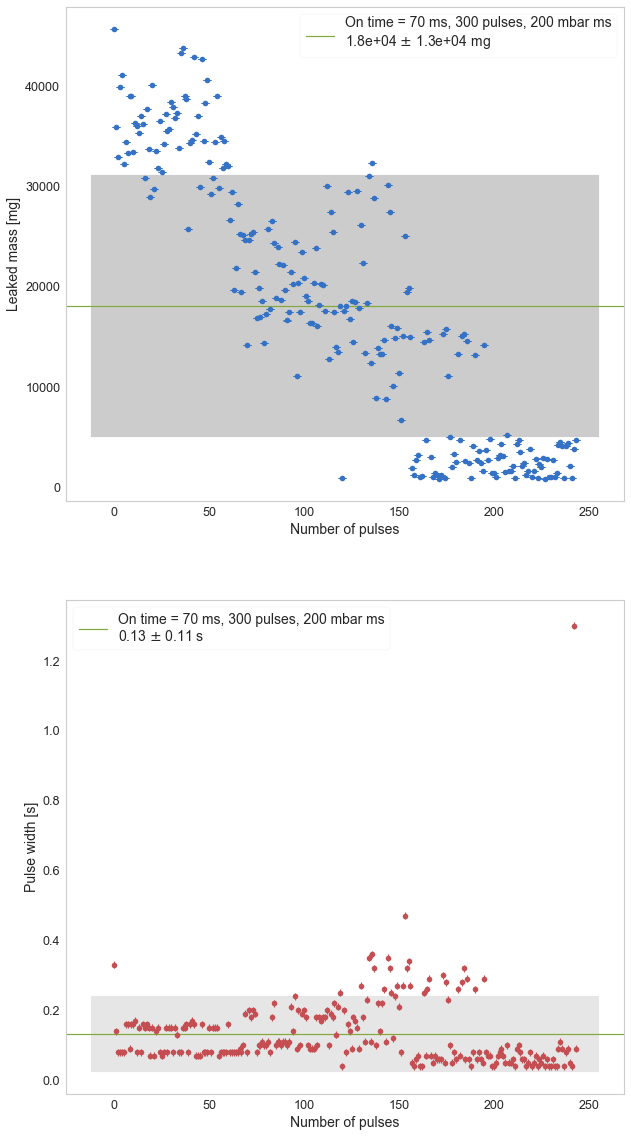

In [178]:
delta_m, q, delta_t, error_delta_m = leaked_mass(df1, peaks1, troughs1, M = 41)
plot_leak_distributions(q, error_delta_m, delta_t, label = '70 ms, 300 pulses, 200 mbar')

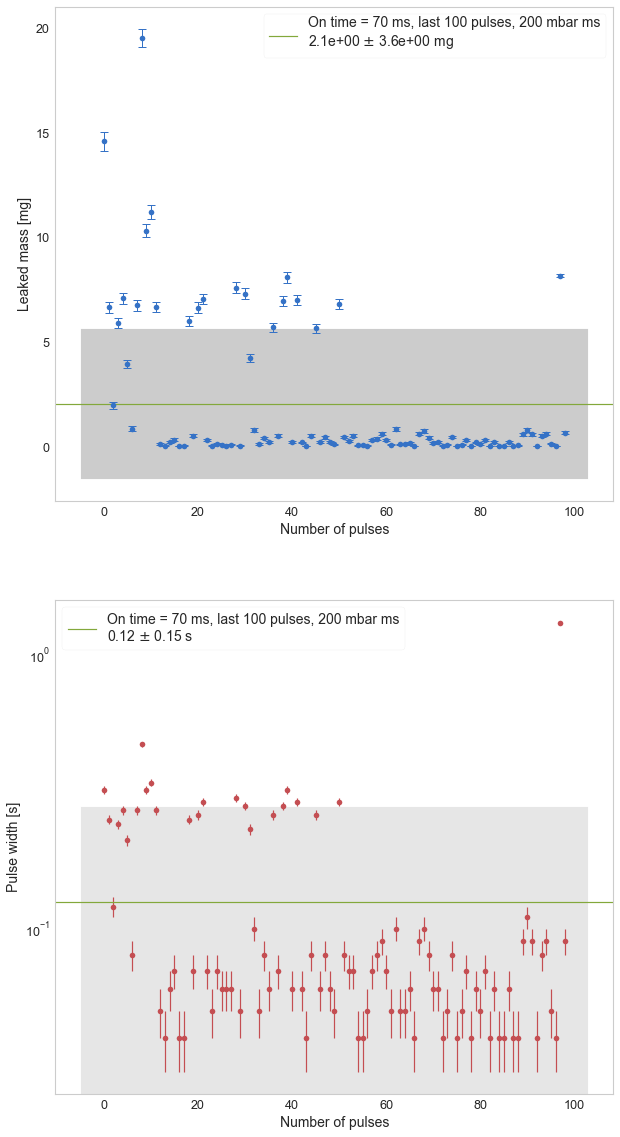

In [34]:
# delta_m, q, delta_t, error_delta_m = leaked_mass(df1, peaks1, troughs1, M = 41)
plot_leak_distributions(delta_m[145:], error_delta_m[145:], delta_t[145:], label = '70 ms, last 100 pulses, 200 mbar')
plt.yscale('log')

##### As we can see, from pulse 150 onwards, both the injected mass and the pulse width systematically drop

In [27]:
av_m = np.average(delta_m)
sd_m = np.std(delta_m)
av_m, sd_m, av_m-sd_m

(0.004487766361887604, 0.004126301591778426, 0.0003614647701091775)

In [43]:
# av_m150 = np.average(delta_m[])
len(delta_m[145:][delta_m[145:] > np.average(delta_m[145:])])
# np.average(delta_m[145:])


23

### How long does the solution last?

In [5]:
V_stock = 0.30 # mL through syringe
dV_stock = 0.01
N = 400-150
dN = 23 # Error estimated from the number of points above the systematic drop starting from pulse 150
V_inj = V_stock/N
dV_inj = V_inj*np.sqrt( (dV_stock/V_stock)**2 + (dN/N)**2)
V_inj, dV_inj

(0.0012, 0.00011742299604421613)

### Cross check with leaked mass calculation

In [6]:
rho_solv = 786 # g/L
M = 41 # g/mol
av_v = av_m*rho_solv
dav_v = av_n/av_m*sd_m
av_v, dav_v

NameError: name 'av_m' is not defined

##### Okay so the leaked mass calculation is damn wrong, good to know

# Run 3 (reload Vstock, t$_{on}$ = 50 ms) 

 - V$_{stock}$ = 0.3 mL
 - p$_{Ar}$ = 1000 mbar
 - t$_{on}$ = 50 ms
 - 100 pulses

In [6]:
df2 = load_raw_ali_df('../ali_data/depletion_tests/26072019_Depletion_200mbar_50ms_350pulses_rga')

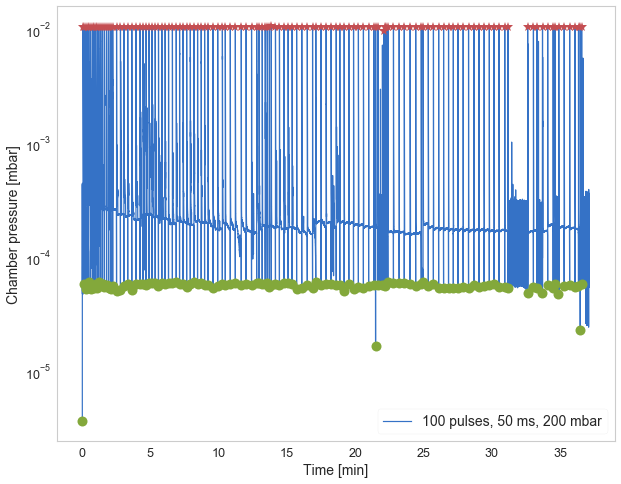

In [7]:
peaks2, troughs2 = plot_pressure_curve(df2, tit='100 pulses, 50 ms, 200 mbar', th=0.9)

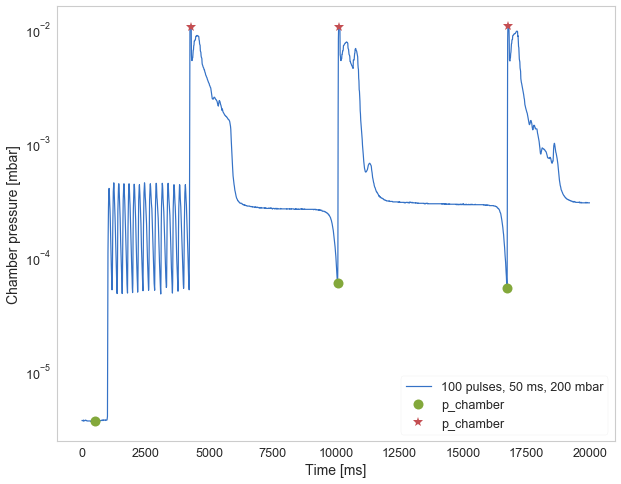

In [181]:
plot_pressure_curve(df2[:2000], tit='100 pulses, 50 ms, 200 mbar', th = 0.9, scale='ms')
von = df2.index[(df2.valve == 1) & (df2.index < 2000)]
# plt.plot(von/100/60, df2.p_chamber[von], 'sk', label='Valve == True')
plt.legend()

In [133]:
len(peaks2)

127

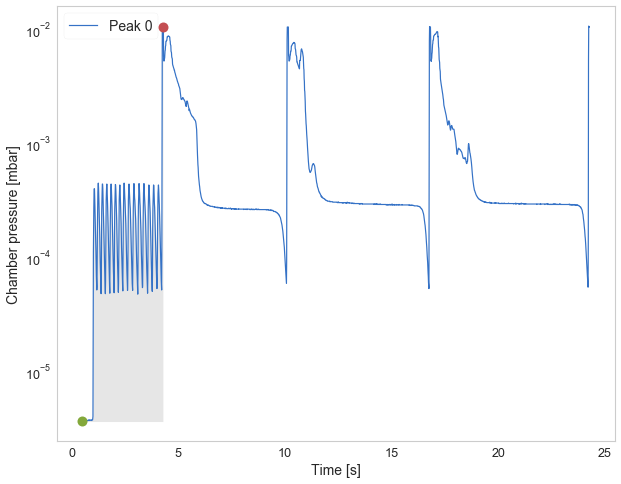

In [117]:
zoom_peak(0, df2, peaks2, troughs2, xrange=2000)

zoom_peak(126, df2, peaks2, troughs2, xrange=3000)

### Another way to find out the total Npeaks is through the data parameters "valve" [on/off]
Since logtime = 10 ms and t_on = 50 ms, for each peak there should be 5 points for which df2.valve == 1:

In [335]:
df2

,datetime,p_chamber,p_act,p_lock,p_pre-inj,t_valve,valve,time_on
0,2019-07-26 15:17:06.350,0.000004,0.00006,0.01,225.0,25.1,0,50
1,2019-07-26 15:17:06.360,0.000004,0.00006,0.01,225.0,25.1,0,50
2,2019-07-26 15:17:06.370,0.000004,0.00006,0.01,225.0,25.1,0,50
3,2019-07-26 15:17:06.380,0.000004,0.00006,0.01,225.0,25.1,0,50
4,2019-07-26 15:17:06.390,0.000004,0.00006,0.01,225.0,25.1,0,50
5,2019-07-26 15:17:06.400,0.000004,0.00006,0.01,225.0,25.1,0,50
6,2019-07-26 15:17:06.410,0.000004,0.00006,0.01,225.0,25.1,0,50
7,2019-07-26 15:17:06.420,0.000004,0.00006,0.01,225.0,25.1,0,50
8,2019-07-26 15:17:06.430,0.000004,0.00006,0.01,225.0,25.1,0,50
9,2019-07-26 15:17:06.440,0.000004,0.00006,0.01,225.0,25.1,0,50


In [162]:
df2.index[df2.valve == 1]

Int64Index([    98,     99,    100,    101,    102,    117,    118,    119,
               120,    121,
            ...
            222752, 222753, 222754, 222755, 222756, 222773, 222774, 222775,
            222776, 222777],
           dtype='int64', length=1721)

In [325]:
df2

,datetime,p_chamber,p_act,p_lock,p_pre-inj,t_valve,valve,time_on
0,2019-07-26 15:17:06.350,0.000004,0.00006,0.01,225.0,25.1,0,50
1,2019-07-26 15:17:06.360,0.000004,0.00006,0.01,225.0,25.1,0,50
2,2019-07-26 15:17:06.370,0.000004,0.00006,0.01,225.0,25.1,0,50
3,2019-07-26 15:17:06.380,0.000004,0.00006,0.01,225.0,25.1,0,50
4,2019-07-26 15:17:06.390,0.000004,0.00006,0.01,225.0,25.1,0,50
5,2019-07-26 15:17:06.400,0.000004,0.00006,0.01,225.0,25.1,0,50
6,2019-07-26 15:17:06.410,0.000004,0.00006,0.01,225.0,25.1,0,50
7,2019-07-26 15:17:06.420,0.000004,0.00006,0.01,225.0,25.1,0,50
8,2019-07-26 15:17:06.430,0.000004,0.00006,0.01,225.0,25.1,0,50
9,2019-07-26 15:17:06.440,0.000004,0.00006,0.01,225.0,25.1,0,50


In [125]:
len(df2.valve[df2.valve == 1])/5

344.2

## Compare to solvent only shape 

In [164]:
dfsolv = load_raw_ali_df(f'../ali_data/Acetonitrile/200mbar/10072019_Acetonitrile_200mbar_50ms_DwellTime2ms_10pulses_rga')

[array([ 103,  969, 1886, 2738, 3600, 4541, 5536, 6613, 7502, 8480]),
 array([  97,  961, 1877, 2728, 3591, 4533, 5529, 6605, 7491, 8472])]

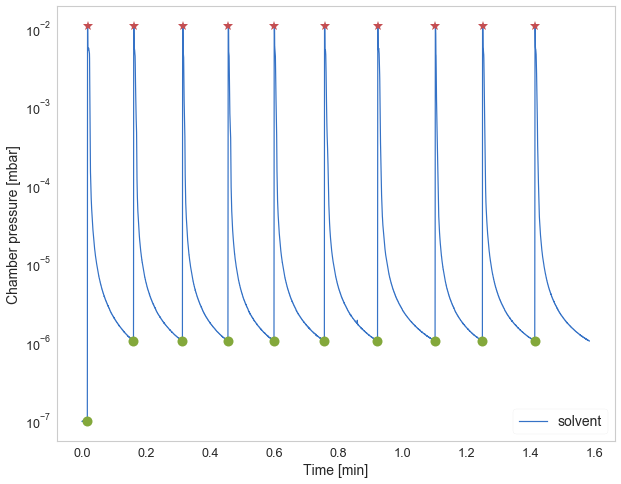

In [165]:
plot_pressure_curve(dfsolv, tit = 'solvent')

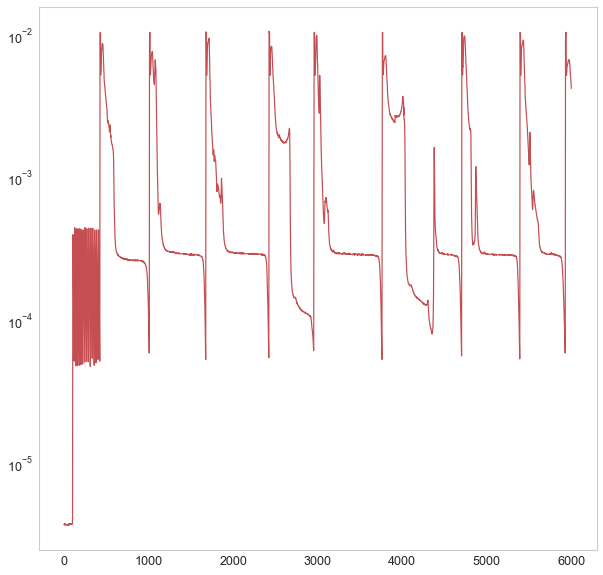

In [177]:
xs = dfsolv.index.values
ys = dfsolv.p_chamber.values

xm = df2.index.values[:6000]
ym = df2.p_chamber[:6000].values

plt.figure(figsize=(10,10))
# plt.plot(xs, ys, '-b', label='Solvent curve')
plt.plot(xm, ym, '-r', label='Molecule curve')
plt.yscale('log')

## Crosscheck with RGA

In [8]:
from rga.rga_sw import *

In [9]:
filename = f'../rga_data/depletion/20190726_150955_Faraday_FBI_depletion_1mM_50ms_200mbar_mid.asc'
df_mid1 = load_mid_data(filename)

In [579]:
filename = f'../rga_data/depletion/20190726_150955_Faraday_FBI_depletion_1mM_50ms_200mbar_mid.asc'
def load_mid_data(filename: str):
    head = pd.read_csv(filename, sep='\s+', skiprows=5, nrows=1)
    names = head.columns.values
    nions = len(names)

    ##### Establish the column names (timestamp, relative_time and ion_current) as index in level 1
    index2 = np.array(['time', 'rel_time', 'ion_current'])

    #####  Declare a MultiIndex object from the euclidean product ion_masses $\times$ properties
    mi = pd.MultiIndex.from_product([names, index2], names=['mass', 'properties'])

    ##### Read the actual data skipping headers and set the MultiIndex to its columns

    myparser = lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S.%f ')
    df_mid = pd.read_csv(filename, sep='\t', skiprows=8, header=None, decimal=',', 
                    names=[str(x) for x in range(3*nions)], parse_dates=[str(x) for x in range(0,nions,3)], date_parser=myparser)
    df_mid.columns = mi
    return df_mid

In [10]:
df_mid1['16'].time[0]
# df_mid['16'].time.apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S.%f '))


Timestamp('2019-07-26 03:16:21.608000')

In [23]:
for m in masses:
    df_mid1[str(m)].time = df_mid1[str(m)].time + datetime.timedelta(hours=12)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(1e-12, 5e-09)

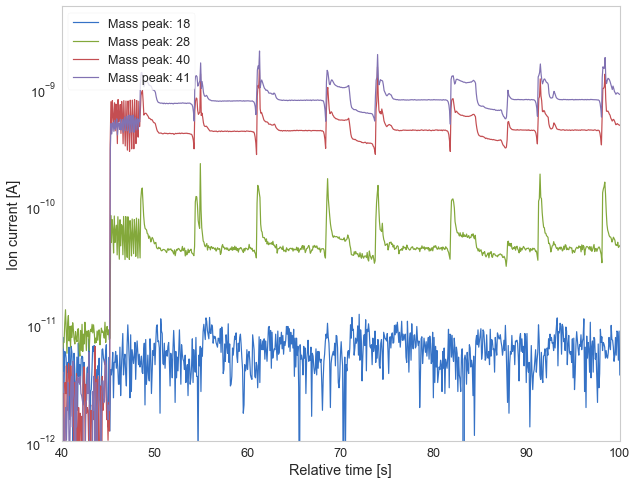

In [9]:
masses = [18, 28, 40, 41]
masses = [str(x) for x in masses]
plot_MID(df_mid1, masses, xlims=(40, 100))
plt.ylim(1e-12, 5e-9)

In [13]:
masses = {18: 'H2O'}#, 28: 'N2', 40: 'Ar', 41: 'AcN'}


In [412]:
df_mid1['16'].rel_time[cutInd]

45.184

In [519]:
cutInd = df_mid1.index[df_mid1['41'].ion_current > 1e-10][0]
dftest = df_mid1[cutInd:]
for m in masses:
    print(dftest[str(m)].rel_time.values - dftest['16'].rel_time[cutInd])

[1.100000e-02 8.900000e-02 1.660000e-01 ... 1.920569e+03 1.920646e+03
 1.920723e+03]
[2.200000e-02 1.000000e-01 1.770000e-01 ... 1.920580e+03 1.920657e+03
 1.920734e+03]
[4.400000e-02 1.220000e-01 1.990000e-01 ... 1.920602e+03 1.920679e+03
 1.920756e+03]
[5.500000e-02 1.330000e-01 2.100000e-01 ... 1.920613e+03 1.920690e+03
 1.920767e+03]


/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/legend.py:508: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


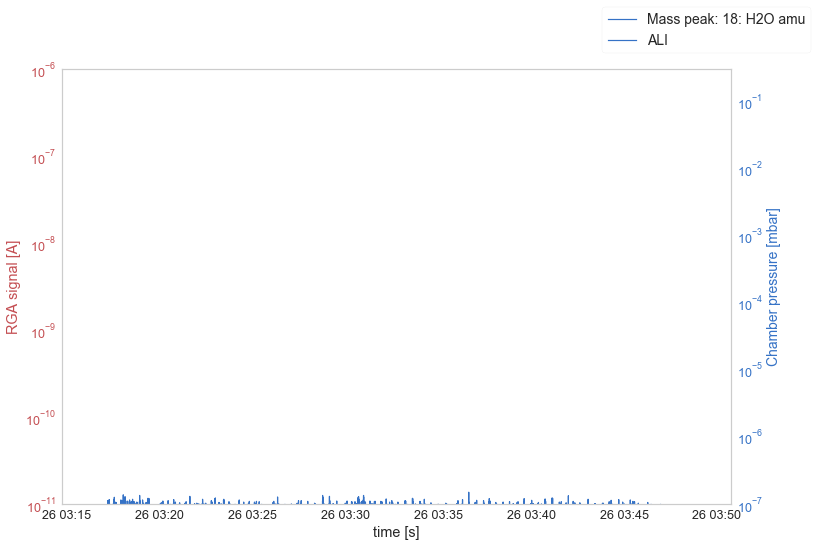

In [18]:
fig, ax1 = plt.subplots(figsize=(12,8))
scale = 's'
mass_lb = ['H20', 'N2', 'Ar', 'AcN']

ax1.set_xlabel('time ['+scale+']')
ax1.set_ylabel('RGA signal [A]', color='r')
for i,m in enumerate(masses):
    x = df_mid1[str(m)].time.values #- df_mid1['16'].rel_time[cutInd]
    y = df_mid1[str(m)].ion_current

    ax1.plot(x, y, '-', label='Mass peak: {}: {} amu'.format(m, masses[m]))

ax1.tick_params(axis='y', labelcolor='r')
ax1.set_xlim()

ax2 = ax1.twinx()
ax2.set_ylabel('Chamber pressure [mbar]', fontsize=14, color='b')

scaleFactor = 100

ax2.plot(df2.datetime.values, df2.p_chamber.values, '-', label='ALI');

xlims = (0, 80)
# ax1.set_xlim(xlims)
# ax2.set_xlim(xlims)

ax2.set_yscale('log')
ax1.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(1e-11,1e-6)
ax2.set_ylim(1e-7,0.3)
fig.legend(loc='best',fontsize=14);

In [12]:
scale = 's'
def plot_ALI_RGA(dfALI: pd.DataFrame, dfMID: pd.DataFrame, masses: dict, 
                 scale : str = 's', xlims : tuple = None, ylimsRGA : tuple = None, ylimsALI : tuple = None,
                 figsize : tuple = (12,8)):
    """Overplot ALI and RGA pressure curves in xtwin axes.
    Parameters:
    ----------
    dfALI : DataFrame
        ALI data
    dfMID : DataFrame
        RGA MultiIon Detection data
    masses: dict
        Masses dictionary, keys are the ions atomic masses in amu and values are ion names
        E.g: masses = {18: 'H2O'}
    scale: str
        Time scale units, accepts ('min', 's' and 'ms') default 's'
    xlims : tuple
        Temporal limits. If None, full time is plotted
    """    
    
    if scale == 'ms':
        scaleFactor = 0.1
    elif scale == 's':
        scaleFactor = 100
    else:
        scaleFactor = 6000
        
    fig, ax1 = plt.subplots(figsize=(12,8))
    
    ax1.set_xlabel('time ['+scale+']')
    ax1.set_ylabel('RGA signal [A]', color='b')
    for m in masses:
        x = dfMID[str(m)].rel_time - dfMID[str(m)].rel_time[0]
        y = dfMID[str(m)].ion_current
        
        ax1.plot(x, y, '-', label='Mass peak: {}: {}'.format(m, masses[m]))

    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    ax2.set_ylabel('ALI Chamber pressure [mbar]', fontsize=14, color='k')

    ax2.plot(dfALI.index.values/scaleFactor, dfALI.p_chamber.values, '-k', label='ALI');

    if xlims != None:
        ax1.set_xlim(xlims)
        ax2.set_xlim(xlims)
    if (ylimsRGA != None) or (ylimsALI != None):
        ax1.set_ylim(ylimsRGA)
        ax2.set_ylim(ylimsALI)
    
    ax2.set_yscale('log')
    ax1.set_yscale('log')
    ax2.tick_params(axis='y', labelcolor='k')
    fig.legend(loc='best',fontsize=14);

In [13]:
masses = {18: 'H2O', 28: 'N2', 40: 'Ar', 41: 'AcN'}
plot_ALI_RGA(df2, df_mid1, masses, xlims=(0,80), ylimsRGA=(1e-11,1e-6), ylimsALI=(1e-7, 0.3))

NameError: name 'df2' is not defined

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/legend.py:508: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


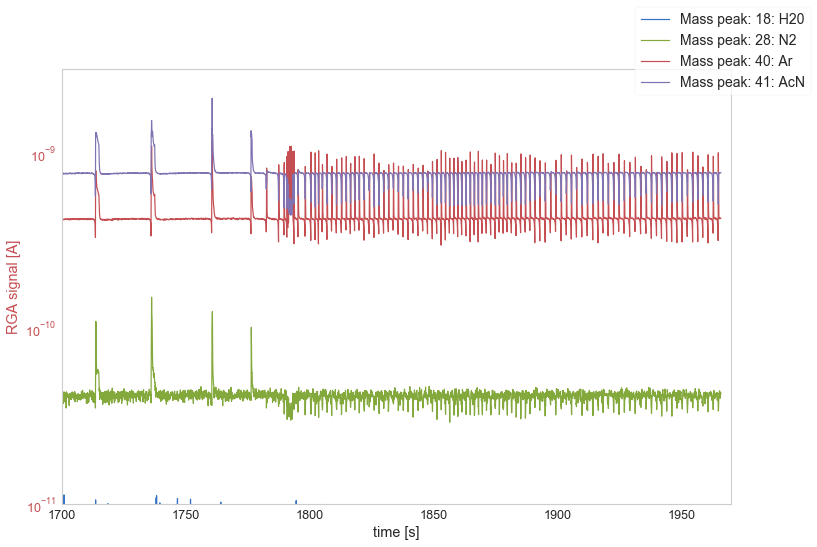

In [441]:
fig, ax1 = plt.subplots(figsize=(12,8))
scale = 's'
mass_lb = ['H20', 'N2', 'Ar', 'AcN']

ax1.set_xlabel('time ['+scale+']')
ax1.set_ylabel('RGA signal [A]', color='r')
for i,m in enumerate(masses):
    x = df_mid1[m].rel_time - df_mid1[m].rel_time[0]
    y = df_mid1[m].ion_current

    ax1.plot(x, y, '-', label='Mass peak: '+ m + ': ' + mass_lb[i])
    
ax1.tick_params(axis='y', labelcolor='r')

#ax2 = ax1.twinx()
#ax2.set_ylabel('Chamber pressure [mbar]', fontsize=14, color='b')

scaleFactor = 100

#ax2.plot(df2.index.values/scaleFactor, df2.p_chamber.values, '-', label='ALI');

xlims = (1700, 1970)
ax1.set_xlim(xlims)
#ax2.set_xlim(xlims)

#ax2.set_yscale('log')
ax1.set_yscale('log')
#ax2.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(1e-11,3e-9)
#ax2.set_ylim(1e-7,0.3)
fig.legend(loc='best',fontsize=14);

In [436]:
df_mid1

mass                             16                          \
properties                     time  rel_time   ion_current   
0           7/26/2019 03:16:21.683      0.076  2.136491e-12   
1           7/26/2019 03:16:21.761      0.154  1.933016e-12   
2           7/26/2019 03:16:21.839      0.231  1.322590e-12   
3           7/26/2019 03:16:21.914      0.307  2.441704e-12   
4           7/26/2019 03:16:21.992      0.384  3.255606e-12   
5           7/26/2019 03:16:22.070      0.462  2.543442e-12   
6           7/26/2019 03:16:22.146      0.539  3.764294e-12   
7           7/26/2019 03:16:22.224      0.617  2.950393e-12   
8           7/26/2019 03:16:22.302      0.694  5.493835e-12   
9           7/26/2019 03:16:22.378      0.771  4.883409e-12   
10          7/26/2019 03:16:22.456      0.848  4.171245e-12   
11          7/26/2019 03:16:22.533      0.925  2.950393e-12   
12          7/26/2019 03:16:22.610      1.003  4.578196e-12   
13          7/26/2019 03:16:22.688      1.080  4.985146e-12   
14          7/26/2019 03:16:22.765      1.157  9.156392e-13   
15          7/26/2019 03:16:22.842      1.235  4.476458e-12   
16          7/26/2019 03:16:22.920      1.312  4.679934e-12   
17          7/26/2019 03:16:22.997      1.389  3.255606e-12   
18          7/26/2019 03:16:23.073      1.466 -2.034753e-13   
19          7/26/2019 03:16:23.151      1.543  4.272983e-12   
20          7/26/2019 03:16:23.228      1.620  2.136491e-12   
21          7/26/2019 03:16:23.304      1.697  3.866032e-12   
22          7/26/2019 03:16:23.383      1.775  4.679933e-12   
23          7/26/2019 03:16:23.459      1.852  2.543442e-12   
24          7/26/2019 03:16:23.536      1.929  7.121638e-13   
25          7/26/2019 03:16:23.614      2.006  3.255606e-12   
26          7/26/2019 03:16:23.690      2.083  3.153868e-12   
27          7/26/2019 03:16:23.768      2.160  1.119114e-12   
28          7/26/2019 03:16:23.846      2.238  1.322590e-12   
29          7/26/2019 03:16:23.922      2.315  4.069507e-13   
...                             ...       ...           ...   
25404       7/26/2019 03:49:05.261   1963.653  2.848655e-12   
25405       7/26/2019 03:49:05.338   1963.731  3.459081e-12   
25406       7/26/2019 03:49:05.416   1963.808  5.799048e-12   
25407       7/26/2019 03:49:05.494   1963.886  3.866032e-12   
25408       7/26/2019 03:49:05.570   1963.963  2.136491e-12   
25409       7/26/2019 03:49:05.648   1964.041  1.933016e-12   
25410       7/26/2019 03:49:05.726   1964.118  5.900786e-12   
25411       7/26/2019 03:49:05.802   1964.195  3.255606e-12   
25412       7/26/2019 03:49:05.880   1964.273  5.799048e-12   
25413       7/26/2019 03:49:05.958   1964.350  4.578196e-12   
25414       7/26/2019 03:49:06.034   1964.427  1.729540e-12   
25415       7/26/2019 03:49:06.112   1964.504  5.392097e-12   
25416       7/26/2019 03:49:06.190   1964.582  1.119115e-12   
25417       7/26/2019 03:49:06.266   1964.659  2.034754e-12   
25418       7/26/2019 03:49:06.344   1964.737  3.052133e-13   
25419       7/26/2019 03:49:06.422   1964.814  2.645180e-12   
25420       7/26/2019 03:49:06.499   1964.892  1.322590e-12   
25421       7/26/2019 03:49:06.576   1964.969  7.325113e-12   
25422       7/26/2019 03:49:06.654   1965.046  3.866032e-12   
25423       7/26/2019 03:49:06.732   1965.124  4.985146e-12   
25424       7/26/2019 03:49:06.808   1965.201  1.119115e-12   
25425       7/26/2019 03:49:06.886   1965.278  4.069507e-12   
25426       7/26/2019 03:49:06.963   1965.356  2.645180e-12   
25427       7/26/2019 03:49:07.040   1965.433  3.967770e-12   
25428       7/26/2019 03:49:07.119   1965.511  2.441704e-12   
25429       7/26/2019 03:49:07.194   1965.587 -5.086885e-13   
25430       7/26/2019 03:49:07.272   1965.664  3.255606e-12   
25431       7/26/2019 03:49:07.350   1965.742  4.985147e-12   
25432       7/26/2019 03:49:07.426   1965.819  3.662556e-12   
25433       7/26/2019 03:49:07.504   1965.896  2.238229e-12   

mass                          

In [361]:
(df1.datetime[1] - df1.datetime[0])

Timedelta('0 days 00:00:00.010000')

To-Do
 - Run2 and 3: 
  - Dig into 2 pulses shape and water increase
  - Overlap RGA pulses
  - Analyse V_inj
  - Plot sum of signals
 - General:
  - Give results V_inj vs t_on
  - Estimation cone factor

In [17]:
M = 41
av_ntot = av_m/M
sd_ntot = sd_m/M

V_inj = 0.3 # mL

NameError: name 'av_m' is not defined

In [4]:
df2 = load_raw_ali_df('../sabatsw/ali/ali_data/22032019_fluorescein_1000mbar_10ms_10pulses_au')
peaks_and_troughs(df2.p_chamber)

(array([   111,  45638, 150217, 258075, 309687, 358980, 420701, 475352,
        541494]),
 array([    99,  45626, 150202, 258062, 309670, 358967, 420683, 475337,
        541479]))

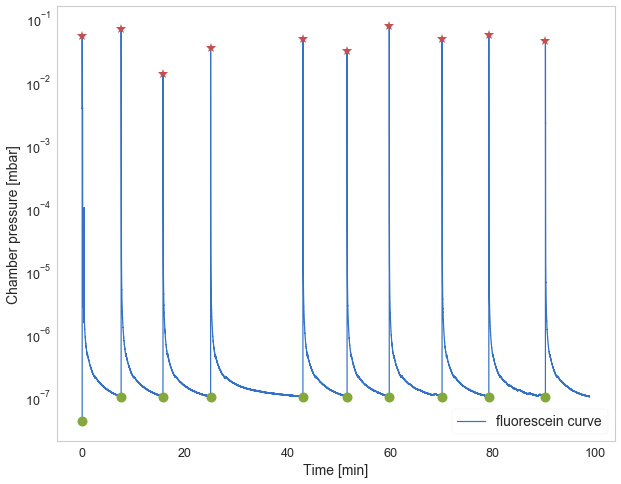

In [5]:
pflu, tflu = plot_pressure_curve(df2, tit='fluorescein curve')

In [11]:
def overlay_peaks(df: pd.DataFrame, peaks: np.array, troughs: np.array, 
                  npulses : int, xrange : int = 900, scale: str = 's'):
    """Shift and overlap pulses to check reproducibility.
    Params
    ----------
    npulses : int
        Number of pulses to show
    xrange: int
        pulse duration in entries. Default 900 = 9 s
    scale: str
        time scale, accepts: 'ms' and (default) 's'
    """
    if scale == 'ms':
        sc = 1
    else:
        sc = 100
    plt.figure(figsize=(10,8))

    for i in range(npulses):
        y = df.p_chamber[troughs[i]:peaks[i]+xrange]/sc
        x = df.index[troughs[i]:peaks[i]+xrange]/sc - df.index[troughs[i]]/sc

        plt.plot(x, y, '-', label='peak '+str(i));

        plt.xlabel('Time ['+scale+']', fontsize=14)
        plt.yscale('log')
        plt.ylabel('Chamber pressure [mbar]', fontsize=14)
        plt.legend(loc='right',fontsize=14)

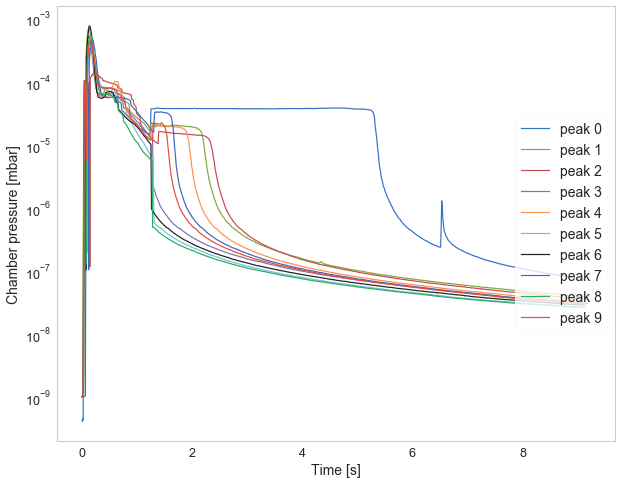

In [23]:
overlay_peaks(df2, pflu, tflu, 10)

In [33]:
from mpl_toolkits.mplot3d import Axes3D
def plot3d_pulses(df : pd.DataFrame, peaks: np.array, troughs: np.array,
                  npulses: int,
                  xrange: int = 400, scale: str = 's'):
    """Shift and 3d-plot npulses"""

    if scale == 'ms':
        sc = 1
    else:       
        sc = 100
    
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection='3d')

    for i in range(npulses-1,-1,-1):
        y = df.p_chamber[troughs[i]:peaks[i]+xrange]/sc
        x = df.index[troughs[i]:peaks[i]+xrange]/sc - df.index[troughs[i]]/sc

        ax.plot(x, y, zs=i, zdir='y', label='peak '+str(i));

        ax.set_xlabel('\nTime ['+scale+']')#, linespacing=3)
        ax.set_zscale('log')
        ax.set_zlabel('\nChamber pressure [mbar]')
        ax.set_ylabel('\nPeak nr')

    #     ax.legend(loc='right',fontsize=14)
    ax.view_init(elev=25., azim=-65)
    plt.show()

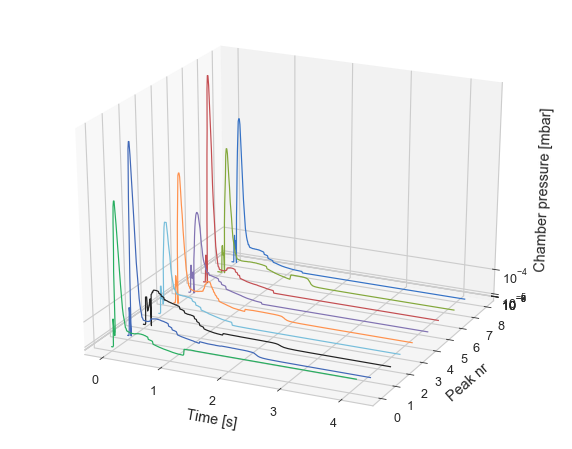

In [34]:
plot3d_pulses(df2, pflu, tflu, 9)

In [27]:
def zoom_peak(peak_id : int, 
             df : pd.DataFrame,
             peaks : np.array, troughs : np.array,
             xrange : int = 900):
    """Use plot_pressure_curve focused on a specific peak index (peak_id) 
    and specify time range (default 900 s)"""
    plot_pressure_curve(df[troughs[peak_id]:peaks[peak_id]+xrange], tit='Peak '+str(peak_id), scale='s', flag_p=False)
    plt.plot(troughs[peak_id]/100, df.p_chamber[troughs[peak_id]], 'o', markersize=10)
    plt.plot(peaks[peak_id]/100, df.p_chamber[peaks[peak_id]], 'o', markersize=10)
    
    x=df.index[troughs[peak_id] : peaks[peak_id]]/100
    plt.fill_between(x, df.p_chamber[troughs[peak_id]], df.p_chamber[troughs[peak_id]:peaks[peak_id]],  color='0.9')#, label='q$_L$ = %.2f mbar•L/s'%q[peak_id])
    

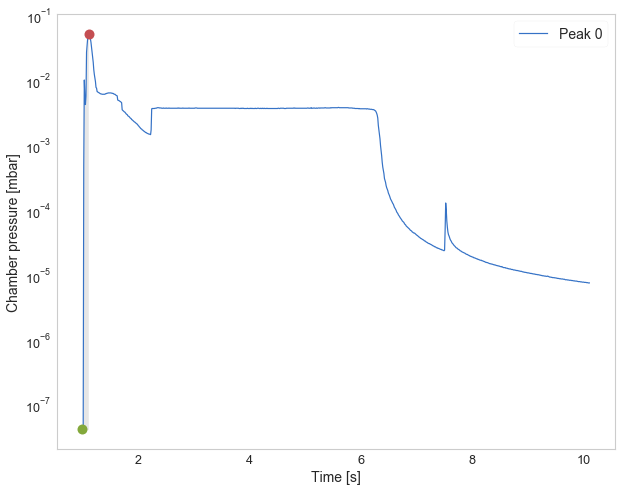

In [28]:
zoom_peak(0, df2, pflu, tflu)

In [81]:
delta_m, q, delta_t, error_delta_m = leaked_mass(df2, pflu, tflu, M = 32.041)

delta_m

array([0.00258526, 0.00350586, 0.00342066, 0.00289294, 0.0029112 ,
       0.00353925, 0.00395316, 0.0038422 , 0.00414747, 0.00339714])

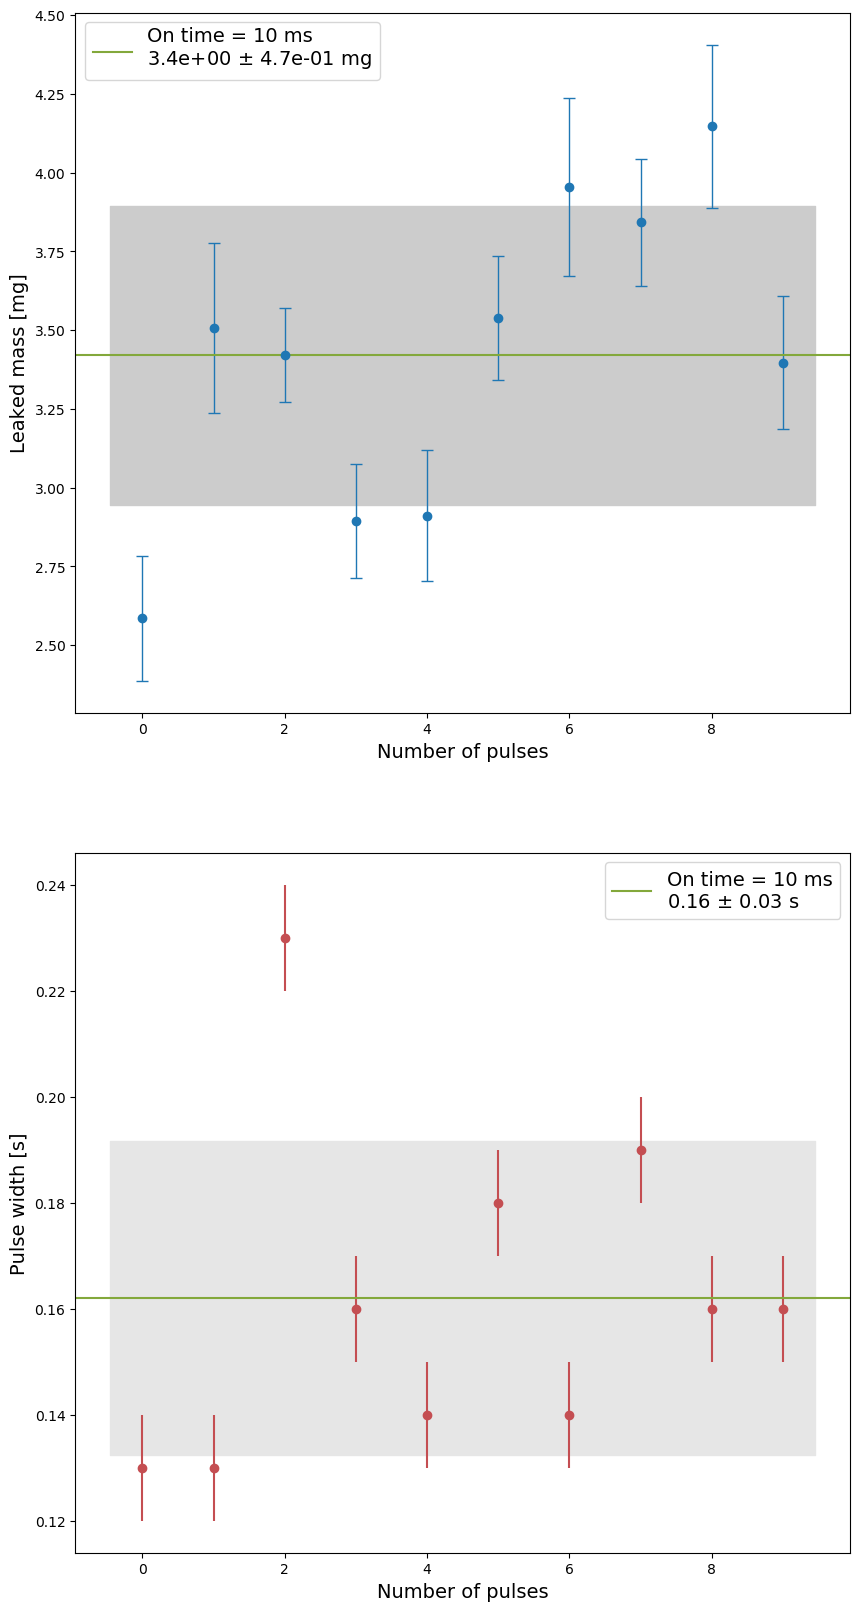

In [83]:
av_m, sd_m, _, _ = plot_leak_distributions(delta_m, error_delta_m, delta_t, label='10')

### Estimate fluorescein (solute) mass injection
$$ q_L = R T \frac{\Delta n_{tot}}{\Delta t} $$

$$ \Delta n_{tot} = \frac{q_L\cdot \Delta t}{RT} = \Delta n_{meth} + \Delta n_{fluo} = \Delta n_{fluo} \left(1+\frac{\Delta V_{meth}\cdot\rho_{meth}/M_{meth}}{\Delta n_{fluo}}\right) = \Delta n_{fluo} \left(1 + \frac{\rho_{meth}}{C\cdot M_{meth}}\right) $$

$C$ : solution concentration = 0.5 mmol/L

$M_{meth}$ : methanol molar mass = 32.041 g/mol

$\rho_{meth}$ : mass density = 792 g/L

$$ \Delta n_{fluo} = \frac{q_L\cdot \Delta t}{RT \left(1+\frac{\rho_{meth}}{C M_{meth}}\right)} $$

In [105]:
def nsolute(q : np.array, delta_t : np.array, df:pd.DataFrame, rho : float = 792.0, M : float = 32.041, C : float = 0.5):
    logtime = (df.datetime[1]-df.datetime[0]).total_seconds() # [10 ms]
    T = df.t_valve[0]+273 # Pulse valve temperature [K]
    R = 83.144598
    
    ntot = q*delta_t/(R*T)
    av_tot = np.average(ntot)
    sd_tot = np.std(ntot)
    
    nsol = q*delta_t/(R*T * (1 + rho/(C * M)))
    av_nsol = np.average(nsol)
    sd_nsol = np.std(nsol)
    
    return [av_nsol, sd_nsol, av_ntot, sd_ntot]

In [109]:
av_nfluo, sd_nfluo, av_ntot, sd_ntot = nsolute(q, delta_t, df)
print ('%.2e +-%.2e mol' %(av_nfluo, sd_nfluo))

3.29e-06 +-9.98e-07 mol


In [110]:
M_fluo = 331.3 #g/mol
print('%.2e +- %.2e g'%(av_nfluo*M_fluo, sd_nfluo*M_fluo))

1.09e-03 +- 3.30e-04 g


#####  From here we estimate the mole fractions:
$$ x_{fluo} = \frac{n_{fluo}}{n_{tot}} \qquad x_{meth} = 1-x_{fluo}$$

In [116]:
x_fluo = av_nfluo/av_ntot
x_fluo, 1-x_fluo

(0.01982684845248357, 0.9801731515475164)

##### Compute average density and molar mass
$$ \bar{M} = \sum_i x_i M_i \qquad  \bar{\rho} = \sum_i x_i \rho_i$$

$$ n_{batch} = \frac{\bar{\rho}}{\bar{M}} V_{batch} $$

In [120]:
M_meth = 32.041 # g/mol
rho_meth = 792.0 # g/L
rho_fluo = 1602.0 # g/L
M_mix = x_fluo*M_fluo + (1-x_fluo)*M_meth
rho_mix = x_fluo*rho_fluo + (1-x_fluo)*rho_fluo

V_batch = 0.3e-3 # L
n_batch = rho_mix/M_mix * V_batch
n_batch

0.012655906881486344

#####  Then the minimum number of pulses we need to deplete the batch is
$$ N_{pulses}^{(min)} = \frac{n_{batch}}{n_{pulse}} $$

In [121]:
n_batch/av_ntot

76.24066687482524

In [124]:
av_ntot

0.00016599942524460446

# Result

In [125]:
print("Typical leak mass: %.1e +- %.1e g" %(av_m, sd_m))

Typical leak mass: 5.3e-03 +- 1.6e-03 g


In [52]:
av_m/0.166155*1e3

0.257394611551979

## Other stuff: pumping speed
First approx. (no vapor pressure taken into account)

In [107]:
len(np.where(df2.valve.values != 0)[0])

10

In [50]:
avg/1e-3, sd*1e3, np.average(error_delta_m)*1e3

(0.026358223836644674, 0.00403068162584347, 0.0017622614319262179)

#####  Argon pumping speed
$Q_P = \frac{1}{4}A_Pn<v>\sigma$ = 0.54 mbar•l/s

$S_{eff}$ = 66 l/s

$S = Q_P/P = A_P C' \sigma$

$C' (273K) = \frac{1}{4} <v> = 9.85 $ l/(s•cm$^2$)

$A_P$ (CF 40) = 62.3 cm$^2$

##### Assuming $\sigma$ = 1, i.e. total capture probability:

In [35]:
A = np.pi/4*63**2/100 # DN 63 mm^2 -> cm^2
v = 4*9.85
C = v/4
S = A*C
S, v

(307.0486630866605, 39.4)

#####  Which agrees with the result in 
https://indico.cern.ch/event/471931/contributions/1149644/attachments/1226014/1794773/JUAS_Vacuum_Technology.pdf slide 47
From this we can conclude that $S_{eff} \neq  S$ and we can estimate $\sigma = S_{eff}/S = 0.21$ 

In [42]:
Seff = 66
sigma = Seff/S
sigma

0.21494964132565644

#####  This probability does not have to coincide with that of methanol, but we will assume it does for the moment

In [38]:
R = 83.144598
M = 32.041
T = 273

v_meth = np.sqrt(8*R*T/(np.pi*M))
v_meth

42.47323774458813

In [44]:
S_meth = A*v_meth/4
Seff_meth = S_meth*sigma
S_meth, Seff_meth

(330.9987529552709, 71.14806322697504)

##### This should make sense keeping in mind that the molecular mass of methanol is lighter than that of Argon

However this assumes, as said, that the methanol behaves immediately as an ideal gas following the Boltzmann distribution for thermal velocity and that the capture rate is the same as for Argon, which I doubt, methanol should be more reactive